In [12]:
import face_recognition as fr
from PIL import Image 
import cv2
from emotion_detect import create_model
from Face_Detect2 import get_pred_in_words, check_if_face_detected
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
model = create_model()
model.load_weights('emotion_weights').expect_partial()

In [26]:
 def show_image_with_emotion_detect(image):
    
    if check_if_face_detected(image) == "no face":
        return print("No face detected")
        
    else:   
        font = cv2.FONT_ITALIC

        img = fr.load_image_file(image)
        face_locations = fr.face_locations(img, model = 'hog')

        num_of_faces = len(face_locations)

        z = get_pred_in_words(image)

        for i in range(num_of_faces):
            x = face_locations[i]

            cv2.rectangle(img, (x[3], x[0]), (x[1], x[2]), (0,255,0),  (2))
            cv2.rectangle(img, (x[3] - 1, x[2]), (x[1] + 1, x[2] + 20), (0, 255, 0), (-1))
            cv2.putText(img, z[i], (x[3] + 1, x[2]+17), font, (.5), (0,0,255), 1, cv2.LINE_4) 

        #plt.imshow(img)

        #pil_image = Image.fromarray(img)
        #pil_image.show()
        #image = img.imread(img)
        plt.figure(figsize=(16, 12))
        plt.imshow(img)
        plt.show()

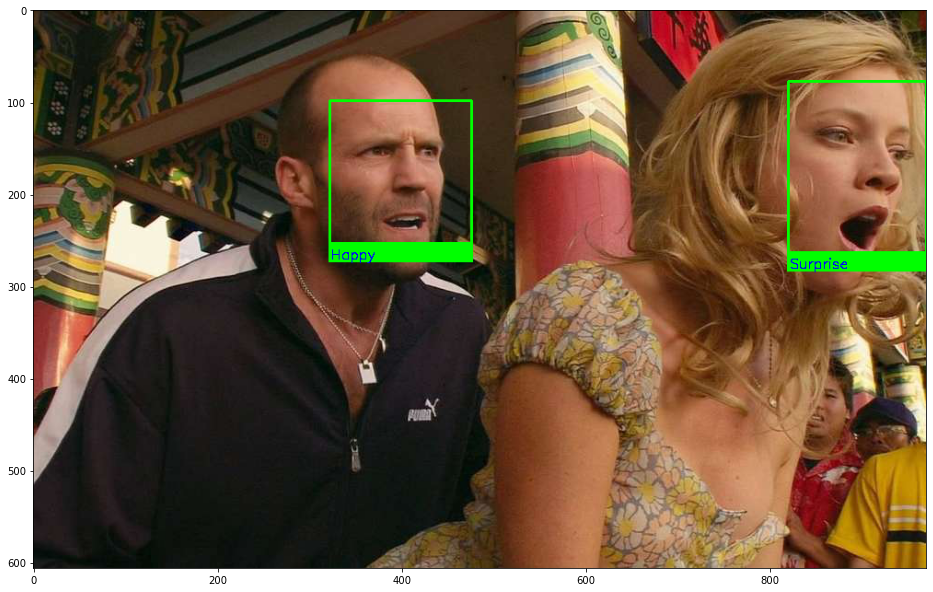

In [29]:
show_image_with_emotion_detect('face_242.jpg')